# Airplanes Crash Analysis 1908-2009

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [3]:
df.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
dtype: int64

## Make a column for year & month using apply method

Make sure all values get converted!

In [4]:
df['year'] = df['Date'].apply(lambda x: int(x[-4:])) #you can use split too, but some dates have separation of dashes instead of slash. 
df['month'] = df['Date'].apply(lambda x: int(x[0:2]))
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,month
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10


In [5]:
df.count()

Date            5268
Time            3049
Location        5248
Operator        5250
Flight #        1069
Route           3562
Type            5241
Registration    4933
cn/In           4040
Aboard          5246
Fatalities      5256
Ground          5246
Summary         4878
year            5268
month           5268
dtype: int64

In [6]:
df['month'].dtype

dtype('int64')

## Remove the Flight #, cn/in columns 

In [7]:
df = df.drop(['Flight #', "cn/In"], axis=1)
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,Aboard,Fatalities,Ground,Summary,year,month
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,8
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,9
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,10


## Which year had the most airplane crashes?

In [8]:
print("{0} has the most crashes.".format(df['year'].value_counts().index[0]))

1972 has the most crashes.


## Which operator had the most crashes?

In [9]:
print("{0} Operator has the most crashes.".format(df['Operator'].value_counts().index[0]))

Aeroflot Operator has the most crashes.


## Which Route is the least risky?

In [10]:
indexes = list((df['Route'].value_counts()).index)
index_vals = (df['Route'].value_counts()).tolist()
print("Least Risky Routes are\n", indexes[index_vals.index(1):])

Least Risky Routes are
 ['Rawalpindi - Lahore', 'Vitoria - Rio de Janeiro', 'AtlantiCity, NJ - AtlantiCity, NJ', 'Amritsar - Srinagar', 'Chrisinau, Moldova - Antalya, Turkey - Sudan', 'Omaha, NE - Hot Springs, SD', 'Chicago - Tampa', 'Bamaga - Lockhart River', 'Cap Haitien - Port au Paix', 'Vieux Fort - Kingstown', 'Krasnodar - Omsk', 'Fresno, CA - Santa Ana, CA', 'Bishkek - Tehran, Iran', 'Shanghai - Los Angeles', 'Minola - Albany - Buffalo', 'Malta - Miami - Reykjavík - Gander', 'Louisville, KY - Nashville, TN', 'Minneapolis, MN - St. Paul, MN', 'Wichita, KS - Mena, AR', 'Donetsk - Sochi /Rostov na Donu - Kerch', 'Port Colombus, OH - Louisville, KY', 'Ruidoso - Albuquerque', 'Tapacula - Mexico City', 'Jakarta - Yogyakarta', 'Taipei - Matsu', 'Marseille - Oran', 'Guangzhou - Hong Kong', 'Burlington, IA - Quincy, IA', 'San Bernardion - Los Angeles', 'Medellín - Popayán', 'Sao Paulo - Belo Horizonte', 'Boise, ID - Colorado Springs, CO', 'Bombay - Bangalore', 'Hanoi - Na San', 'LaTuque -

## How many total fatalities occurred in year 1972?

Find all rows of 1972 and then take the Fatalities sum

In [11]:
print("Fatalities in 1972 are {0}".format(df[df['year'] == 1972]['Fatalities'].sum()))

Fatalities in 1972 are 2937.0


## How much percent of people survived in the entire dataset?

In [12]:
print("People who survived throughout are {0}".format((((df['Aboard'] - df['Fatalities']).sum())/df['Aboard'].sum())*100))

People who survived throughout are 27.113613880222204


## How many planes were such that there was no registration, and yet the number of people who survived were greater than 40%?

Filter only those who do not have some valid registration

In [13]:
df_no_regs = df[df['Registration'].isnull() == True]
num_plane_crashes_greaterthan_40 = df_no_regs[((df_no_regs['Aboard'] - df_no_regs['Fatalities'])/df_no_regs['Aboard']) > 0.4]
len(num_plane_crashes_greaterthan_40)

29

## Which type of aircraft is used by most operators?

In [14]:
print("{0} type of aircraft is the used the most.".format(df['Type'].value_counts().index[0]))

Douglas DC-3 type of aircraft is the used the most.


## Which operator has the least & most people involved in deaths?

In [17]:
operator_groups = df.groupby('Operator')
max_fatalities = df['Fatalities'].max()
min_fatalities = df['Fatalities'].min()

death_dict = {}
for name, group in operator_groups:
    death_dict[name] = group['Fatalities'].sum()

## sort a dictionary by the values. .items() gives you a list containing tuples. 
## Example: [(key, value), (key, value)....]
## reverse = True meaning in descending order
## key=lambda x: x[1] --> meaning sort by the element at index 1 of every tuple
## https://docs.python.org/3/howto/sorting.html#sortinghowto

sorted_operator_by_death = (sorted(death_dict.items(), key=lambda x: x[1], reverse=True))
print ("Most deaths:", sorted_operator_by_death[0], "Least deaths:", sorted_operator_by_death[-1])
#extract the max & min from this!

Most deaths: ('Aeroflot', 7156.0) Least deaths: ('Western Helicopter', 0.0)


## Number of crashes per year - sorted by year and a bar chart
http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html#pandas.DataFrame.plot  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html?highlight=sort

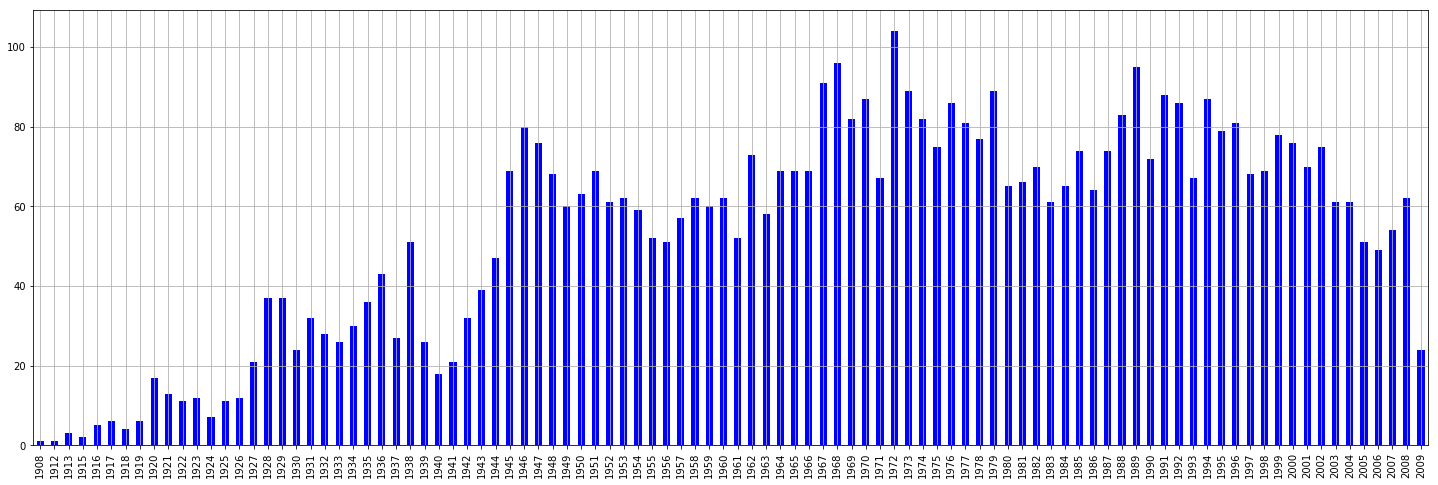

In [18]:
ax = df['year'].value_counts().sort_index().plot(kind='bar', figsize=(25, 8), grid=True, color='b')

## Number of passengers per year & fatalities in the same plot - sorted by year and line chart

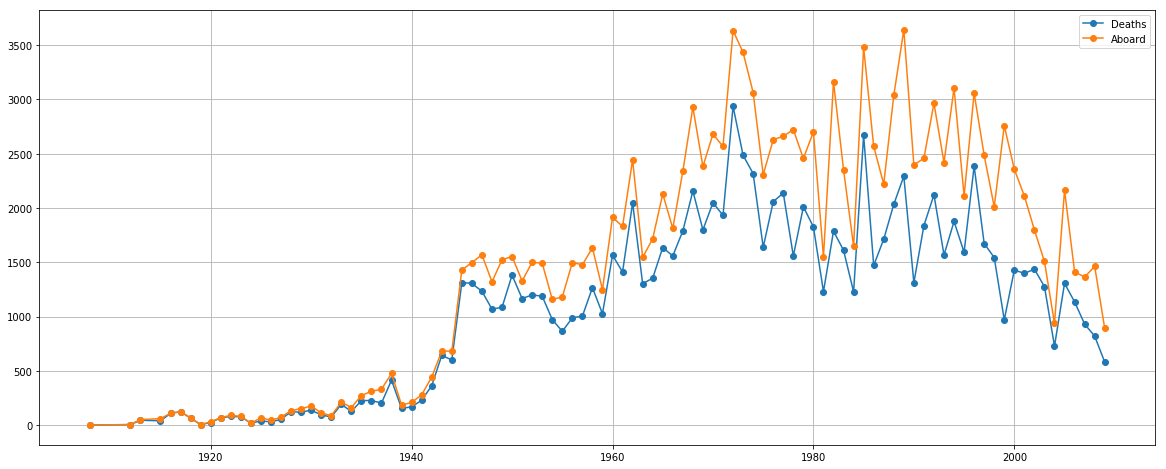

In [19]:
year_group = df.groupby('year')
year = []
deaths = []
total_pass = []
for name, group in year_group:
    year.append(name)
    deaths.append(group['Fatalities'].sum())
    total_pass.append(group['Aboard'].sum())

plt.figure(figsize=(20, 8))
plt.plot(year, deaths, label='Deaths', marker='o')
plt.plot(year, total_pass, label='Aboard', marker='o')
plt.legend()
plt.grid()
plt.show()

## Plot the total number of accidents of military and regular operators 

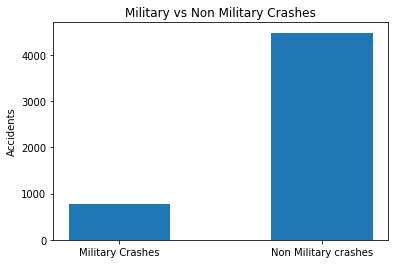

In [20]:
df_military_num = len(df[df['Operator'].apply(lambda x: "military" in str(x).lower())])
df_military_non_num = len(df) - df_military_num

objects = ['Military Crashes', 'Non Military crashes']
accidents = [df_military_num, df_military_non_num]
x_coordinates = np.arange(len(objects))

plt.bar(x_coordinates, accidents, align='center', width=0.5) #default width is 0.8
plt.xticks(x_coordinates, objects)
plt.ylabel('Accidents')
plt.title('Military vs Non Military Crashes')
plt.show()

## Count of accidents by month

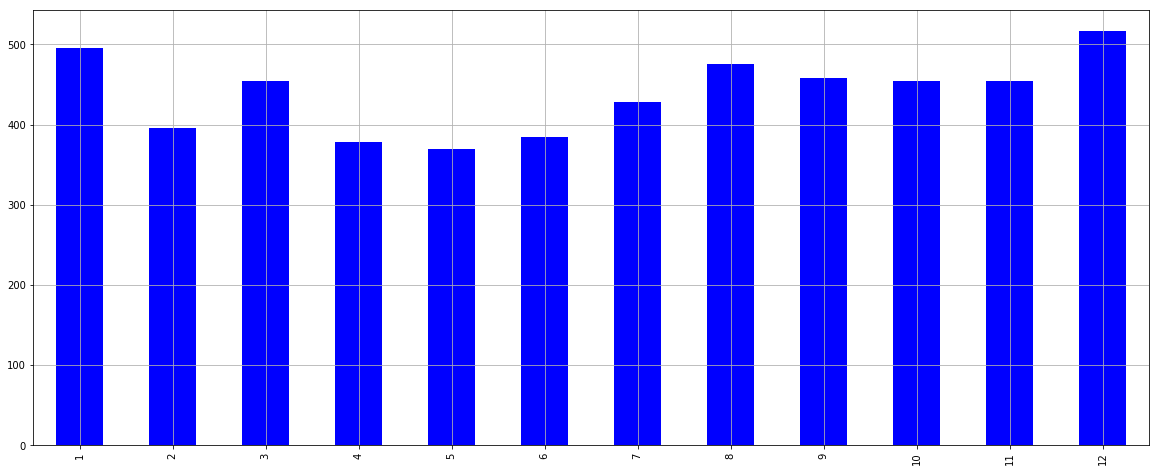

In [21]:
df['month'].value_counts().sort_index().plot(kind='bar', figsize=(20, 8), grid=True, color='b')

## The number of accidents for the operator Aeroflot per year 

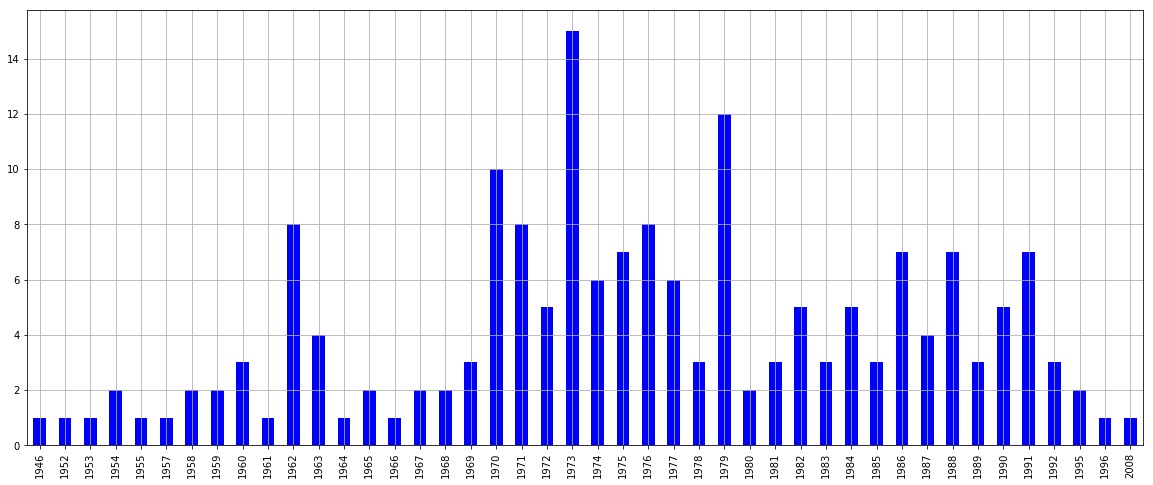

In [22]:
df_aeroflot = df[df['Operator'] == 'Aeroflot']
df_aeroflot['year'].value_counts().sort_index().plot(kind='bar', figsize=(20, 8), grid=True, color='b')

## Top 10 operators by number of accidents

In [ ]:
df['Operator'].value_counts().head(10).plot(kind='bar', figsize=(20, 8), grid=True, color='b')